## Polinomsal Regresyon Nedir?
Doğrusal bir regresyonda girdi (x) ve çıktı (y) arasında lineer (doğrusal/line) bir ilişki olduğu varsayılmaktadır. Öte yandan polinomsal regresyonda ise girdi ve çıktı arasındaki ilişki düz bir doğru biçiminde değildir. Burada bir doğru yerine eğriden (curve) bahsedebiliriz. Ve temelde polinomsal regresyon bize bu eğrinin fonksiyonunu vermektedir. 

Polinomal regresyonun matematiksel teorisi, bağımlı ve bağımsız değişkenler arasındaki doğrusal olmayan ilişkiyi bir polinom denklemi aracılığıyla modellemeyi içerir. Polinomal regresyon, bir polinom fonksiyonunu kullanarak veri noktalarına en uygun şekilde uyan bir eğriyi bulmayı amaçlar. Bu fonksiyonun katsayıları, veriye en iyi uyum sağlayacak şekilde istatistiksel yöntemlerle tahmin edilir.

Temel olarak, polinomal regresyon denklemi şu şekildedir:

y = β0 + β1 * x + β2 * x² + … + βn * x^n

Burada:

y, bağımlı değişkeni temsil eder.
x, bağımsız değişkeni temsil eder.
n, polinom derecesini belirtir. n, 1'den büyük bir tam sayıdır.
β0, β1, β2, …, βn. Bu katsayılar, polinomun katsayılarıdır ve veriye uygun bir şekilde tahmin edilir.

Polinomal regresyon analizi, genellikle en küçük kareler yöntemi kullanılarak gerçekleştirilir. Bu yöntem, veri noktaları ile polinomun tahmin ettiği değerler arasındaki hataları minimize etmeye çalışır. Bu hatayı minimize etmek için regresyon katsayıları hesaplanır.

Polinomal regresyon analizi aşağıdaki adımları içerebilir:

Veri Toplama: İlgilenilen bağımlı ve bağımsız değişkenlerin verileri toplanır.
Polinom Derecesi Seçimi: Hangi dereceden bir polinomun kullanılacağına karar verilir. Bu, genellikle deneme yanılma veya istatistiksel değerlendirme ile belirlenir.
Regresyon Katsayılarının Hesaplanması: En küçük kareler yöntemi veya başka bir tahmin yöntemi kullanılarak regresyon katsayıları hesaplanır.
Model Değerlendirmesi: Elde edilen polinom modelinin performansı değerlendirilir. Bu, istatistiksel anlamlılık testleri, R-kare değeri veya diğer model değerlendirme yöntemleri kullanılarak yapılabilir.
Tahmin ve Yorumlama: Model oluşturulduktan sonra, bağımsız değişken değerleri verildiğinde bağımlı değişkenin tahmini değerleri hesaplanabilir. Aynı zamanda, regresyon katsayıları üzerinden bağımsız değişkenlerin bağımlı değişken üzerindeki etkisi yorumlanabilir.

Aşağıdaki veriler, on evin KW Saat cinsinden aylık elektrik tüketimleri ve bu evlerin metrekare cinsinden alanlarını veriyor. Regresyon modeli oluşturarak ilişkiye bakalım.

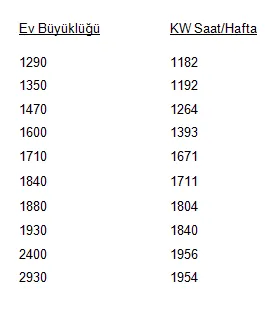



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd
  
# verimizi oluşturalım.
data = {'Ev_Büyüklüğü': [1290,1350,1470,1600,1710,1840,1880,1930,2400,2930],
        'KW_saat': [1182,1192,1264,1393,1671,1711,1804,1840,1956,1954] }
  
# DataFrame oluşturalım.
df = pd.DataFrame(data)



In [2]:
#Normalizasyon, belirli bir veri kümesi için en basit yapıyı bulmakla ilgilidir.
#Daha doğru analizler sağlar.
#min- max scalling ile df içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde güncelliyoruz.

df.Ev_Büyüklüğü = (df.Ev_Büyüklüğü - df.Ev_Büyüklüğü.min() )/ (df.Ev_Büyüklüğü.max() - df.Ev_Büyüklüğü.min())
df.KW_saat = (df.KW_saat - df.KW_saat.min() )/ (df.KW_saat.max() - df.KW_saat.min())

Text(0.5, 1.0, 'X y arasındaki ilişki')

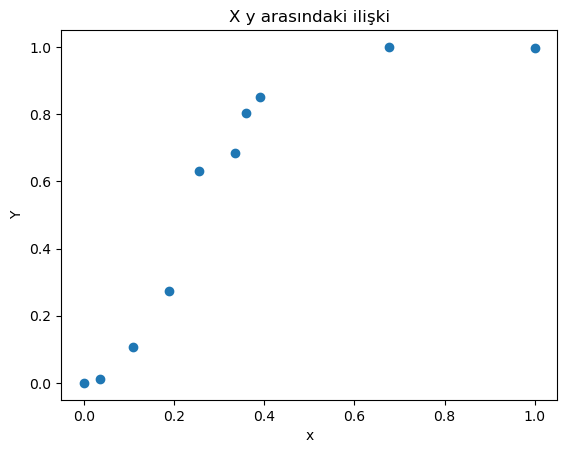

In [3]:
X = df.Ev_Büyüklüğü
y = df.KW_saat

plt.scatter(X.values,y.values)
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y arasındaki ilişki')

Önce Lineer Regresyon modeli kurup ardından Polinomal Regresyon modeli kurarak ikisini karşılaştırıp grafik üzerinde inceleyelim.

In [4]:
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

#reshape işlemi ile 1D olan array'imizi 2D hale getirerek üzerinde çalışmaya devam ediyoruz. 

print(lineer_regresyon.intercept_)
print(lineer_regresyon.coef_)

print("Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon.intercept_,lineer_regresyon.coef_[0]))

[0.15637893]
[[1.1313292]]
Elde edilen regresyon modeli: Y=[0.15637893]+[1.1313292]X


B0 ve B1 katsayılarını lineer model için görüntülüyoruz.

In [5]:
y_predicted = lineer_regresyon.predict(X.values.reshape(-1,1))
r2_score(y,y_predicted)

0.7462306412488874

R Square değeri bağımsız değişkenin bağımlı değişken üzerinde ne kadar etkili olduğunu açıklamaktadır. R2 değeri ne kadar büyük ise bağımsız değişkenin, bağımlı değişken üzerinde o kadar çok etkili olduğu anlaşılmaktadır.

Kırmızı eğri modelin tahmin eğrisini gösterir. Eğrinin değerler ile arasındaki uzaklık göze çarpıyor. Eğriyi değerlere göre uydurmak için polinomal regresyon kuralım ve modelin uyumunu ve tahmin gücünü arttıralım.

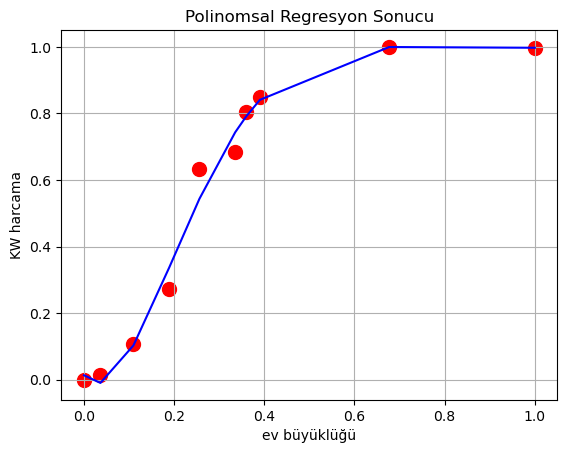

In [6]:
X = np.array(X).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
# Polinom derecesini belirlenir
poly_reg = PolynomialFeatures(degree = 5)
# Belirlenen dereceye göre bağımsız değişken hazırlanır
X_poly = poly_reg.fit_transform(X)
# Model eğitilir
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
def polynomialRegressionVisual():
    plt.scatter(df["Ev_Büyüklüğü"],
                df["KW_saat"],
                s=100,
                c="red",
                edgecolors='red'
                )
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polinomsal Regresyon Sonucu')
    plt.xlabel('ev büyüklüğü')
    plt.ylabel('KW harcama')
    plt.grid(True)
    plt.show()
    return
polynomialRegressionVisual()

Grafikte overfitting ve underfitting problemi görülmüyor. Şimdi modelimiz daha doğru tahminler yapacak.